In [18]:
import os, sys
cur_path = os.path.abspath(os.path.dirname('__file__'))
basic_path = cur_path.replace('classify', 'basic')

sys.path.append(basic_path)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [20]:
digits = datasets.load_digits()
X = digits.data
# 如果不用copy，则y和digits指向同一个引用，修改y则会修改digits
y = digits.target.copy()

# 模拟数据倾斜，只关注数字为9的数据
y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
from metrics import FPR, TPR

In [28]:
fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype=int)
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

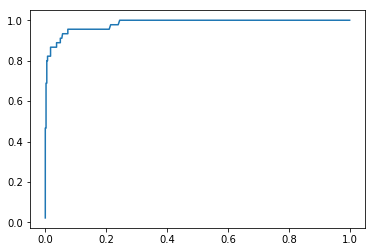

In [29]:
plt.plot(fprs, tprs)
plt.show()

### scikit-learn 中的 ROC-Curve

In [30]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

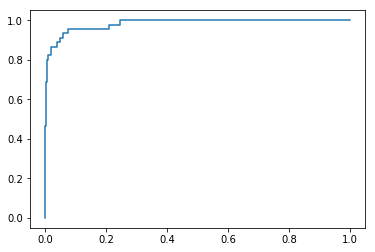

In [31]:
plt.plot(fprs, tprs)
plt.show()

In [32]:
from sklearn.metrics import roc_auc_score

# ROC面积越大，分类效果越好
# 当fpr越小，tpr越大，此时对应的面积越大
roc_auc_score(y_test, decision_scores)

0.9830452674897119